数据读取pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'data/'
## 1) 载入训练集和测试集；
train_data = pd.read_csv(path + 'used_car_train_20200313.csv', sep=' ')
test_data = pd.read_csv(path+'used_car_testB_20200421.csv', sep=' ')

c:\users\1\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
print(np.shape(train_data))
print(train_data.info())
print(train_data.isnull().sum())
train_data.head()

(150000, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  in

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [3]:
# 分类指标评价:accuracy等
from sklearn.metrics import accuracy_score, roc_auc_score 
# 回归指标评价
from sklearn.metrics import mean_squared_error, mean_absolute_error

# EDA

In [4]:
# 通过.info()查看特征类型，其中notRepairedDamage为object
print(train_data['notRepairedDamage'].value_counts()) # 存在缺失值
#用NaN替换
train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)
test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)
print(train_data['notRepairedDamage'].value_counts())

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64
0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64


In [5]:
train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [6]:
#对于binary数值的特征，可以查看所属类别是否倾斜
print(train_data['gearbox'].value_counts())
print(train_data['seller'].value_counts()) # 倾斜， 删除
print(train_data['offerType'].value_counts()) # 倾斜， 删除

0.0    111623
1.0     32396
Name: gearbox, dtype: int64
0    149999
1         1
Name: seller, dtype: int64
0    150000
Name: offerType, dtype: int64


In [7]:
del train_data['seller']
del train_data['offerType']
del test_data["seller"]
del test_data["offerType"]

了解预测值的分布

(array([1.23906e+05, 1.89270e+04, 4.91800e+03, 1.34000e+03, 4.71000e+02,
        1.88000e+02, 1.24000e+02, 6.00000e+01, 4.80000e+01, 1.80000e+01]),
 array([1.10000e+01, 1.00098e+04, 2.00086e+04, 3.00074e+04, 4.00062e+04,
        5.00050e+04, 6.00038e+04, 7.00026e+04, 8.00014e+04, 9.00002e+04,
        9.99990e+04]),
 <a list of 10 Patch objects>)

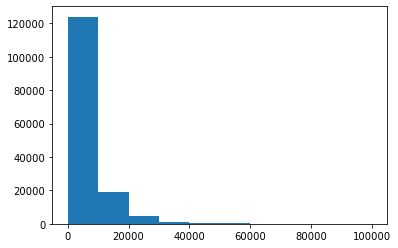

In [8]:
plt.hist(train_data['price'])

(array([   56.,   223.,  1508.,  6232., 22319., 35387., 39059., 33184.,
        11123.,   909.]),
 array([ 2.39789527,  3.30939729,  4.22089931,  5.13240133,  6.04390335,
         6.95540537,  7.86690739,  8.77840941,  9.68991143, 10.60141345,
        11.51291546]),
 <a list of 10 Patch objects>)

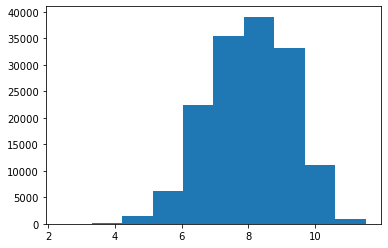

In [9]:
# log变换之后的分布较均匀(正态分布)，可以进行log变换Y值进行预测，这也是预测问题常用的trick
plt.hist(np.log(train_data['price']))

In [10]:
# 分离label
Y_train = train_data['price']

In [11]:
# 分离数字特征和类型特征进行查看
numerical_features = ['power', 'kilometer', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
categorical_features = ['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',
       'creatDate']

对类型数据进行特征unique分布

In [12]:
# 对类型数据进行特征unique分布
for cat_fea in categorical_features:
    print(cat_fea + "t特征分布如下:")
    print("{}特征有{}个不同的值".format(cat_fea, train_data[cat_fea].nunique()))
    print(train_data[cat_fea].value_counts())

SaleIDt特征分布如下:
SaleID特征有150000个不同的值
2047      1
113949    1
15661     1
13612     1
3371      1
         ..
8913      1
10960     1
53967     1
56014     1
0         1
Name: SaleID, Length: 150000, dtype: int64
namet特征分布如下:
name特征有99662个不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
regDatet特征分布如下:
regDate特征有3894个不同的值
20000008    180
20000011    158
20000004    157
20000010    157
20000002    155
           ... 
19910807      1
19910902      1
20151209      1
19911011      1
20151201      1
Name: regDate, Length: 3894, dtype: int64
modelt特征分布如下:
model特征有248个不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brandt特征分布如下:
brand特征有40个不同的值
0     31480
4     16737
14    16089
10    142

In [13]:
numerical_features.append('price')

对数值类型数据进行特征相关性

c:\users\1\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


price        1.000000
v_12         0.692823
v_8          0.685798
power        0.219834
v_5          0.164317
v_6          0.068970
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
Name: price, dtype: float64


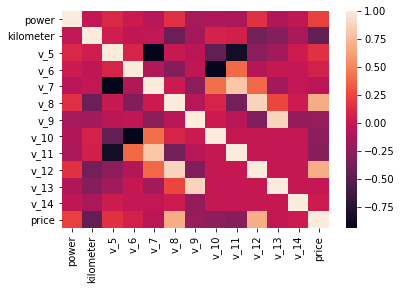

In [14]:
# 对数值类型数据进行特征相关性
import seaborn as sns
price_numeric = train_data[numerical_features]
print(price_numeric.corr()['price'].sort_values(ascending=False))
sns.heatmap(price_numeric.corr())

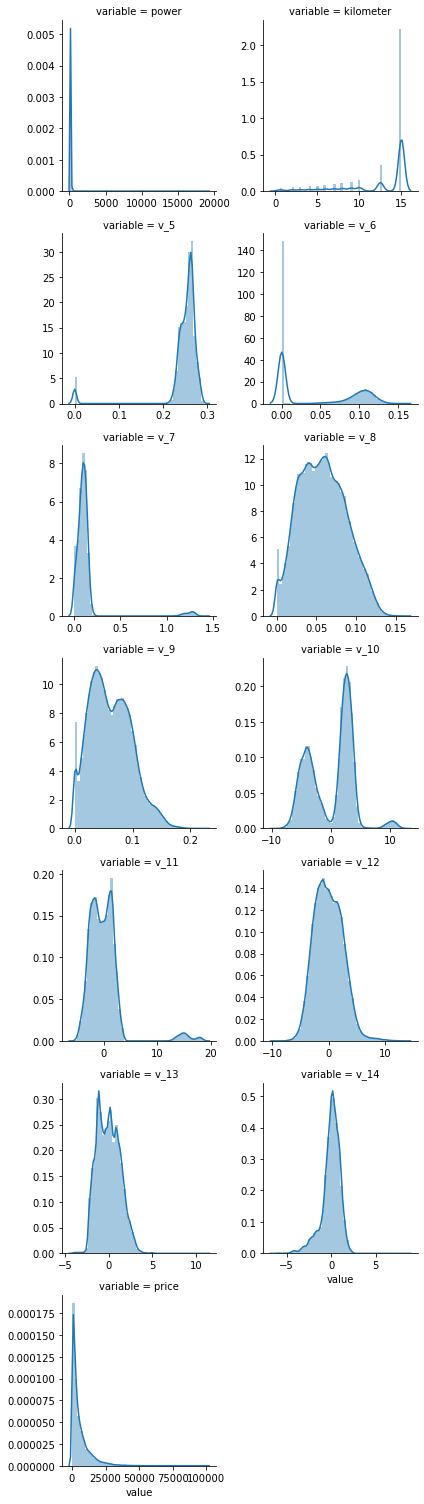

In [15]:
## 3) 每个数字特征得分布可视化
f = pd.melt(train_data, value_vars=numerical_features)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [16]:
# 类型特征的箱型图可视化

# Feature Engineering

In [17]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

In [18]:
path = 'data/'
## 1) 载入训练集和测试集；
train_data = pd.read_csv(path + 'used_car_train_20200313.csv', sep=' ')
test_data = pd.read_csv(path+'used_car_testB_20200421.csv', sep=' ')

异常值删除

In [19]:
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """
    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)
    
    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


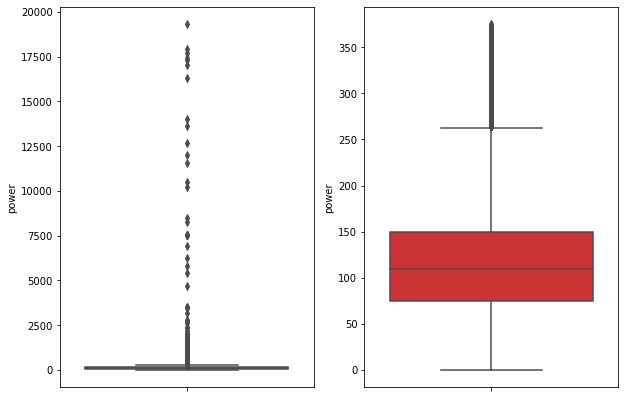

In [20]:
# 我们可以删掉一些异常数据，以 power 为例。
# 但是要注意 test 的数据不能删
train_data = outliers_proc(train_data, 'power', scale=3)

特征构造: train和test都要构造

In [21]:
# 使用时间：data['creatDate'] - data['regDate']，反应汽车使用时间，一般来说价格与使用时间成反比
train_data['creatDate'] = pd.to_datetime(train_data['creatDate'],format="%Y%m%d", errors='coerce')
train_data['regDate'] = pd.to_datetime(train_data['regDate'],format="%Y%m%d", errors='coerce')

train_data['used'] = train_data['creatDate'] - train_data['regDate']

test_data['creatDate'] = pd.to_datetime(test_data['creatDate'],format="%Y%m%d", errors='coerce')
test_data['regDate'] = pd.to_datetime(test_data['regDate'],format="%Y%m%d", errors='coerce')

test_data['used'] = test_data['creatDate'] - test_data['regDate']

In [22]:
train_data['used']

0        4385 days
1        4757 days
2        4382 days
3        7125 days
4        1531 days
            ...   
149032   5772 days
149033   2322 days
149034   2003 days
149035   3673 days
149036   6239 days
Name: used, Length: 149037, dtype: timedelta64[ns]

In [23]:
# 不建议删除，因为删除缺失数据占总样本量过大，7.5%
# 如果我们 XGBoost 之类的决策树，其本身就能处理缺失值，所以可以不用管
train_data['used'].isnull().sum()

11318

In [24]:
# 从邮编中提取城市信息，因为是德国的数据，所以参考德国的邮编，相当于加入了先验知识
train_data['city'] = train_data['regionCode'].apply(lambda x : str(x)[:-3])
test_data['city'] = test_data['regionCode'].apply(lambda x : str(x)[:-3])

In [25]:
train_data = train_data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)
test_data = test_data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

In [26]:
print(train_data.shape)
train_data.columns

(149037, 30)


Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'seller', 'offerType',
       'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'used', 'city'],
      dtype='object')

In [44]:
train_data.to_csv('data_for_tree.csv', index=0) # 导出给树模型用

In [ ]:
# 我们可以再构造一份特征给 LR NN 之类的模型用
# 之所以分开构造是因为，不同模型对数据集的要求不同

In [43]:
# 归一化
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [45]:
train_data['kilometer'] = max_min(train_data['kilometer'])

In [46]:
train_data['power'] = max_min(train_data['power'])

In [47]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149037 entries, 0 to 149036
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype          
---  ------             --------------   -----          
 0   SaleID             149037 non-null  int64          
 1   name               149037 non-null  int64          
 2   model              149036 non-null  float64        
 3   brand              149037 non-null  int64          
 4   bodyType           144543 non-null  float64        
 5   fuelType           140405 non-null  float64        
 6   gearbox            143083 non-null  float64        
 7   power              149037 non-null  float64        
 8   kilometer          149037 non-null  float64        
 9   notRepairedDamage  149037 non-null  object         
 10  seller             149037 non-null  int64          
 11  offerType          149037 non-null  int64          
 12  v_0                149037 non-null  float64        
 13  v_1                149037 non

特征选择

In [27]:
numerical_features = ['power','kilometer','v_5','v_6','v_7','v_8','v_9','v_10','v_11','v_12','v_13','v_14']
train_data

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,used,city
0,0,736,30.0,6,1.0,0.0,0.0,60,12.5,0.0,...,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,4385 days,1
1,1,2262,40.0,1,2.0,0.0,0.0,0,15.0,-,...,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,4757 days,4
2,2,14874,115.0,15,1.0,0.0,0.0,163,12.5,0.0,...,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,4382 days,2
3,3,71865,109.0,10,0.0,0.0,1.0,193,15.0,0.0,...,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,7125 days,
4,4,111080,110.0,5,1.0,0.0,0.0,68,5.0,0.0,...,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1531 days,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149032,149995,163978,121.0,10,4.0,0.0,1.0,163,15.0,0.0,...,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592,5772 days,4
149033,149996,184535,116.0,11,0.0,0.0,0.0,125,10.0,0.0,...,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160,2322 days,2
149034,149997,147587,60.0,11,1.0,1.0,0.0,90,6.0,0.0,...,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931,2003 days,3
149035,149998,45907,34.0,10,3.0,1.0,0.0,156,15.0,0.0,...,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014,3673 days,1


In [28]:
# 过滤法
from sklearn.feature_selection import VarianceThreshold
# 移除方差小的特征
vt = VarianceThreshold(threshold = 1)
data = vt.fit_transform(train_data[numerical_features])
np.shape(data)

c:\users\1\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\1\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\1\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(149037, 7)

In [ ]:
# 包裹式
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
    k_features=10,
    forward=True,
    floating=False,
    scoring = 'r2',
    cv = 0)

x = data.drop(['price'], axis=1)
x = x.fillna(0)
y = data['price']
sfs.fit(x, y)
sfs.k_feature_names_

In [ ]:
# 包裹式
from sklearn.feature_selection import RFE # Recursive Feature Elimination

#递归特征消除法，返回特征选择后的数据
#参数estimator为基模型
#参数n_features_to_select为选择的特征个数
RFE(estimator=LinearRegression(), n_features_to_select=10).fit_transform(x, y)

建模与调参

In [29]:
# reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
    """
    start_mem = df.memory_usage().sum()
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
            
        else:
            df[col] = df[col].astype('category')
        
    end_mem = df.memory_usage().sum()
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [30]:
train_data = reduce_mem_usage(train_data)
test_data = reduce_mem_usage(test_data)

Memory usage of dataframe is 35769008.00 MB
Memory usage after optimization is: 27870543.00 MB
Decreased by 22.1%
Memory usage of dataframe is 11600128.00 MB
Memory usage after optimization is: 9150624.00 MB
Decreased by 21.1%


In [31]:
sample_feature = train_data.dropna().replace('-', 0).reset_index(drop=True)
sample_feature['notRepairedDamage'] = sample_feature['notRepairedDamage'].astype(np.float32)

In [32]:
sample_feature

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,...,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,used,city
0,0,736,30.0,6,1.0,0.0,0.0,60,12.5,0.0,...,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,4385 days,1
1,1,2262,40.0,1,2.0,0.0,0.0,0,15.0,0.0,...,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,4757 days,4
2,2,14874,115.0,15,1.0,0.0,0.0,163,12.5,0.0,...,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,4382 days,2
3,3,71865,109.0,10,0.0,0.0,1.0,193,15.0,0.0,...,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,7125 days,
4,4,111080,110.0,5,1.0,0.0,0.0,68,5.0,0.0,...,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1531 days,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128830,149995,163978,121.0,10,4.0,0.0,1.0,163,15.0,0.0,...,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592,5772 days,4
128831,149996,184535,116.0,11,0.0,0.0,0.0,125,10.0,0.0,...,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160,2322 days,2
128832,149997,147587,60.0,11,1.0,1.0,0.0,90,6.0,0.0,...,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931,2003 days,3
128833,149998,45907,34.0,10,3.0,1.0,0.0,156,15.0,0.0,...,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014,3673 days,1


线性回归 & 五折交叉验证 & 模拟真实业务情况

In [33]:
continuous_feature_names = [x for x in sample_feature.columns if x not in ['price', 'brand', 'model', 'SaleID', 'bodyType', 'fuelType', 'gearbox', 'city']]

In [34]:
train_X = sample_feature[continuous_feature_names]
train_X['used'] = train_X['used'].dt.days
train_y = sample_feature['price']
train_y = np.log(train_y + 1)

c:\users\1\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model = model.fit(train_X, train_y)

In [36]:
'intercept:'+ str(model.intercept_)
sorted(dict(zip(continuous_feature_names, model.coef_)).items(), key=lambda x:x[1], reverse=True)

[('v_11', 92656.80977139722),
 ('v_12', 17121.43413908253),
 ('v_3', 2393.7563961528026),
 ('v_13', 27.2961301360981),
 ('v_14', 0.25391653230011985),
 ('power', 0.001099366784759411),
 ('used', 1.6608816760646422e-06),
 ('name', -4.622468441895567e-08),
 ('kilometer', -0.011320670767547331),
 ('seller', -0.0628497524691657),
 ('notRepairedDamage', -0.25718239686770145),
 ('offerType', -0.4591163136043548),
 ('v_4', -6.574015605610146),
 ('v_7', -59.118235022065534),
 ('v_9', -78.6677115220024),
 ('v_8', -130.95565732361666),
 ('v_6', -236.02251434266404),
 ('v_5', -339.0472169803936),
 ('v_0', -6501.2478639221345),
 ('v_2', -51047.85823816529),
 ('v_10', -120989.82699984002),
 ('v_1', -144437.67877791458)]

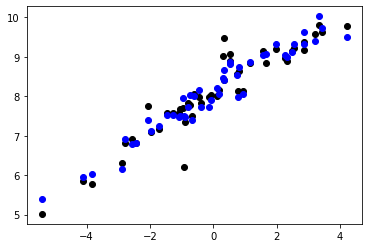

In [37]:
subsample_index = np.random.randint(low=0, high=len(train_y), size=50)

plt.scatter(train_X['v_12'][subsample_index], train_y[subsample_index], color='black')
plt.scatter(train_X['v_12'][subsample_index], model.predict(train_X.iloc[subsample_index]), color='blue')


五折交叉验证

In [45]:
"""
在使用训练集对参数进行训练的时候，经常会发现人们通常会将一整个训练集分为三个部分（比
如mnist手写训练集）。一般分为：训练集（train_set），评估集（valid_set），测试集
（test_set）这三个部分。这其实是为了保证训练效果而特意设置的。其中测试集很好理解，其
实就是完全不参与训练的数据，仅仅用来观测测试效果的数据。而训练集和评估集则牵涉到下面
的知识了

因为在实际的训练中，训练的结果对于训练集的拟合程度通常还是挺好的（初始条件敏感），但
是对于训练集之外的数据的拟合程度通常就不那么令人满意了。因此我们通常并不会把所有的数
据集都拿来训练，而是分出一部分来（这一部分不参加训练）对训练集生成的参数进行测试，相
对客观的判断这些参数对训练集之外的数据的符合程度。这种思想就称为交叉验证（Cross
Validation）
"""
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
scores = cross_val_score(model, X=train_X, y=train_y, cv = 5, scoring='neg_mean_squared_error')

In [46]:
print('AVG:', np.mean(scores))

AVG: -0.0860979373716479


绘制学习率曲线与验证曲线

In [48]:
from sklearn.model_selection import learning_curve, validation_curve
"""
确定交叉验证的针对不同训练集大小的训练和测试分数。
交叉验证生成器将整个数据集拆分为训练和测试数据中的k次。 
具有不同大小的训练集的子集将用于训练估计器，并为每个
训练子集大小和测试集计算分数。 之后，对于每个训练子集大小，
将对所有k次运行的得分进行平均。
"""


'\n确定交叉验证的针对不同训练集大小的训练和测试分数。\n交叉验证生成器将整个数据集拆分为训练和测试数据中的k次。 \n具有不同大小的训练集的子集将用于训练估计器，并为每个\n训练子集大小和测试集计算分数。 之后，对于每个训练子集大小，\n将对所有k次运行的得分进行平均。\n'

多种模型对比

In [49]:
# 线性模型有L1和L2正则化

In [50]:
# 非线性模型
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

c:\users\1\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [51]:
models = [LinearRegression(),
DecisionTreeRegressor(),
RandomForestRegressor(),
GradientBoostingRegressor(),
MLPRegressor(solver='lbfgs', max_iter=100),
XGBRegressor(n_estimators = 100, objective='reg:squarederror'),
LGBMRegressor(n_estimators = 100)]

In [52]:
result = dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=train_X, y=train_y, verbose=0, cv = 5, scoring='neg_mean_squared_error')
    result[model_name] = scores
    print(model_name + ' is finished')

LinearRegression is finished
DecisionTreeRegressor is finished


KeyboardInterrupt: 

模型调参